In [1]:
import pandas as pd
import numpy as np
import konlpy
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Okt
import re
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib import font_manager
f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False #마이너스 부호로 한글 꺠짐 방지
rc('font', family='Arial Unicode MS')
%matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

okt = Okt()
# komoran=Komoran()
# kkma=Kkma()
# hannanum=Hannanum()

In [2]:
df = pd.read_excel("/Users/young/git/project/export/비전공자 개발자_2023-01-31.xlsx")
df.rename(columns={'Unnamed: 0':'Rank'},inplace=True)


In [3]:
df.tail(5)

,Rank,title,description,author,timestamp
1045,1045,"문과 개발자, 정말 비전공자도 IT 취업이 가능할까?","문과 개발자, 정말 비전공자도 IT 취업이 가능할까? 문과라서 취업할 길이 보이...",그대 미소에 봄이 돼줄게요,2021.09.18.
1046,1046,"자바 개발자 되는 법, 비전공자에게 적합한 과정은?",자바 개발자 되는 법 비전공자에게 맞는 과정 자바 개발자가 되기 위해 비전공자에...,IT교육및취업전문가 융쌤,2022.06.03.
1047,1047,"소프트웨어개발자되는법, 컴공출신 아닌 비전공자 자바웹포폴...",오늘은 컴공전공생이 아닌 비전공자가 #소프트웨어개발자되는법 #웹개발프로젝트 제작...,월요일에 만든 블로그,2022.01.20.
1048,1048,종로자바학원에서 비전공자도 개발자 취업 가능해요!!,종로자바학원에서 비전공자도 개발자 취업 가능해요!! 비전공자분들의 가장 큰 고민...,따봉아빠의 IT 일상,2017.09.08.
1049,1049,(비전공자 공부순서) 개발자가 하고 싶어요.....,그럼에도 불구하고 디지털노마드를 꿈꾸시거나 개발자의 꿈을 갖고 계신 분 혹은.....,초보개발자 _ 왕곰,2022.09.13.


In [4]:
df['structure'] = ''

In [5]:
def pos_seperator(pos):
    #품사
    pos = re.search(('(?<=\/)[a-zA-Z]*'),tup)[0]
    #형태소
    morphs = re.search(('.+(?=\/)'),tup)[0]

def add_scores():
    return 

def word_parser(df):
    morphs_list = []
    phrase_list = []
    structure_list = []
    morphs_only_list = []
    # count_morphs_list = []
    # count_phrase_list = []
    # df 반복문 돌며 어절, 형태소 분해, 문장구조 분해 
    for idx,rows in df.iterrows():
        split_phrases = okt.phrases(rows[1])
        split_morphs = okt.pos(rows[1], join=True)
        morphs_tmp_list = []

        for i in split_phrases:
            phrase_list.append(i + '/' + 'Noun')
        for i in split_morphs:
            if 'Punctuation' in i:
                continue
            morphs_list.append(i)
            morphs_tmp_list.append(re.split(('/'),i)[0])
    #명사 중복 제거 후 구조화
        # tmp_structure = []
        tmp_structure = ''
        for jdx,tup in enumerate(okt.pos(rows[1])):
            if jdx > 0 and tmp == 'Noun' and tup[1] == 'Noun':
                continue
            tmp = okt.pos(rows[1])[jdx][1]
            # structure_list.append(tup[1])
            # tmp_structure += '_' + tup[1] if jdx != 0 or jdx != len(okt.pos(rows[1])) - 1 else tup[1]
            # if jdx != 0:
            #     tmp_structure += '_' + tup[1]
            # else:
            #     tmp_structure += tup[1]
            tmp_structure += '_' + tup[1]
            # structure_list.append([i for i in tup[1]])
        structure_list.append(tmp_structure)
        morphs_only_list.append(morphs_tmp_list)
    #unique값 찾기
    morphs_set = list(set(morphs_list))
    phrase_set = list(set(phrase_list))
    structure_set = list(set(structure_list))
    #빈도 카운트
    print(len(phrase_set))
    for i in range(len(morphs_set)):
        #두 리스트간 중복 삭제
        if morphs_set[i] in phrase_set:
            phrase_set.remove(morphs_set[i])
        morphs_set[i] = morphs_set[i] + '/' + str(morphs_list.count(morphs_set[i]))

    for i in range(len(phrase_set)):
        phrase_set[i] = phrase_set[i] + '_joint/' + str(phrase_list.count(phrase_set[i]))

    for i in range(len(structure_set)):
        structure_set[i] = structure_set[i] + '/' + str(structure_list.count(structure_set[i]))

    df['morphs'] = morphs_only_list
    return phrase_set,morphs_set,structure_set,structure_list

phrase_set,morphs_set,structure_set,structure_list = word_parser(df)



3251


In [6]:
df_orgin_structure = []
for i in structure_list:
    
    split = re.split(('_'),i)
    del split[0]

    df_orgin_structure.append(split)

df['structure'] = df_orgin_structure



In [7]:
#단어 토큰 df화
frame = {
    'word' : [],
    'pos' : [],
    'cnt' : []
}
word_st = phrase_set + morphs_set
for i in word_st:
    try:
        split = re.split(('/'),i)
        # print(split[1],split[2],split[3])
        frame['word'].append(split[0])
        frame['pos'].append(split[1])
        frame['cnt'].append(int(split[2]))
    except:
        # print(i)
        continue

frame
df2 = pd.DataFrame(frame)
df2 = df2.sort_values(by="cnt",ascending=False)
df2

,word,pos,cnt
3001,비,Noun,1063
3670,전공자,Noun,1062
3594,개발자,Noun,1029
1861,비전공자,Noun_joint,659
2759,취업,Noun,599
...,...,...,...
1426,비전공자 코딩 취업,Noun_joint,1
1427,웹 개발자 기초,Noun_joint,1
1428,비전공자 개발자 국비지원 공부 시작,Noun_joint,1
1429,개발자 국비지원해주는 코딩부트캠프 런프리,Noun_joint,1


In [8]:
# 문장구조 df화
structure_frame = {
    'structure' : [],
    'cnt' : []
}
for i in structure_set:
    split_cnt = re.split(('/'),i)
    cnt = int(split_cnt[-1])
    
    split = re.split(('_'),i)
    del split[0]
    split[-1] = re.split(('/'),split[-1])[0]
    # print(cnt)
    structure_frame['structure'].append(split)
    structure_frame['cnt'].append(cnt)
df3 = pd.DataFrame(structure_frame)
df3 = df3.sort_values(by="cnt",ascending=False)
df3

,structure,cnt
605,[Noun],40
580,"[Noun, Punctuation, Noun]",19
271,"[Noun, Josa, Noun]",18
706,"[Noun, Punctuation]",11
670,"[Noun, Punctuation, Noun, Punctuation]",9
...,...,...
300,"[Noun, Josa, Noun, Verb, Verb, Number, Noun]",1
301,"[Punctuation, Noun, Punctuation, Noun, Punctua...",1
302,"[Number, Noun, Punctuation, Noun]",1
303,"[Number, Verb, Alpha, Noun, Punctuation, Noun,...",1


In [9]:
df3_pop = df3[df3['cnt'] > 1]

for i in range(1):
    sample_structure = random.choices(list(df3_pop['structure']),weights=[i for i in df3_pop['cnt']])[0]



In [10]:
sample_structure_dict = dict.fromkeys(sample_structure)

In [11]:
#문장구조와 단어 조합
def random_choice(sample_list, weight):
    sample = random.choices(sample_list,weights=weight)
    return sample[0]

for pos in sample_structure:
    if pos == 'Noun':
        coin_flip = random_choice(["Noun","Noun_joint"],[0.2,0.8])
        df2_n = df2[df2['pos'] == coin_flip]
    else:
        df2_n = df2[df2['pos'] == pos]
    df2_n.reset_index(drop=False)
    df2_n.sort_values(by='cnt',ascending=False)

    match_senetence = []
    for i,row in df.iterrows():
        if sample_structure == row[5]:
            match_senetence.append(row[1])

    words = []
    
    for i in range(10):
        if pos == 'Punctuation':
            sample = random_choice(["?","!","??","!!"],[1,1,1,1])

        else:
            sample = random_choice(list(df2_n['word']),[i for i in df2_n['cnt']])

        words.append(sample)
    sample_structure_dict[pos] = words

print(sample_structure)
print(match_senetence)
print(sample_structure_dict)

['Noun', 'Punctuation', 'Noun', 'Verb', 'Noun']
['비전공자 개발자 - 준비해야하는 취업 스펙', '웹 개발자 취업 - 국비지원 만 찾는 비전공자', '코딩 개발자 , 비전공자 도 취업 하는 방법']
{'Noun': ['비전공자 IT대기업 취업 가능성', '대상 국비지원', '비전공자', '비전공자', 'IT취업', '풀스택 개발자', '비전공자개발자취업 공부 첫', '비전공자 개발자', '비전공자 개발자', '비전공자 개발자'], 'Punctuation': ['!!', '??', '?', '??', '?', '!!', '!!', '!', '!', '!'], 'Verb': ['할', '받기', '가한다고', '가', '되는', '알려줄게', '할', '싶다면', '일까', '될']}


In [12]:
#꼬리물기를 위한 key-value 생성
tester = list(df['title'])
# tester = ['자바개발자취업 비전공자 교육 과정 안내!']

word_key = []
word_joint = []
for i in tester:
    x = 0
    pos = okt.pos(i)
    # word_joint.append([j[0] for j in pos])
    while True:
        words = ''
        for j in range(x,len(pos)):
            if pos[j][1] == 'Punctuation':
                continue
            words += pos[j][0]
            # if j == x:
            #     word_key.append(words)
            #     continue
            # else:
            #     word_joint.append(words)
            if j != x:
                word_key.append(pos[x][0])
                word_joint.append(words)
        x += 1
        if x == len(pos):
            break;
    
    
word_joint_aggregate = dict.fromkeys(word_key)
df_following_word = pd.DataFrame(word_joint,index=word_key,columns=['word'])

df_unique_counter = pd.DataFrame(df_following_word['word'].value_counts())
df_unique_counter.rename(columns={"word":"count"},inplace=True)
df_unique_counter['word'] = df_unique_counter.index
df_following_word['key'] = df_following_word.index
df_following_word.drop_duplicates(inplace=True)
df_word_joint = pd.merge(df_following_word,df_unique_counter,left_on='word',right_on='word',how='inner')
df_word_joint = df_word_joint[['key','word','count']]

df_word_joint


,key,word,count
0,비,비전공자,1370
1,:,비전공자,1370
2,-,비전공자,1370
3,",",비전공자,1370
4,(,비전공자,1370
...,...,...,...
42823,),개발자가하고싶어요,2
42824,개발자,개발자가하고싶어요,2
42825,가,가하고,1
42826,가,가하고싶어요,1


In [13]:
#꼬리물기를 위한 key-values 등장 확률 계산
unique_starter = list(set(list(df_word_joint['key'])))
df_odds = pd.DataFrame()
num = 0

for starter in unique_starter:

    df_pieces = df_word_joint[df_word_joint['key'] == starter]
    df_pieces['odds'] = df_pieces['count']/df_pieces['count'].sum()

    if num != 0:
        df_odds = pd.concat([df_odds,df_pieces])
    else:
        df_odds = df_pieces
    num += 1


/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [371]:
#꼬리물기 문장 생성 진행 기능
def create_sentence(starter):
    pass_word = ["수","은","는","과","도","이","위",'니','비','시','히']
    starter = starter
    tmp_forward = []

    for i in range (10):
        if True not in list(df_word_joint['key'].isin([starter])):
            starter = okt.morphs(starter)[-1]
            if True not in list(df_word_joint['key'].isin([starter])):
                starter = starter.strip()[-1]

        df_draw = df_odds[df_odds['key'] == starter].sort_values(by='odds',ascending=False)

        draw_words = list(df_draw.head(5).iloc[:,1])
        draw_odds = list(df_draw.head(5).iloc[:,3])
        draw = random_choice(draw_words,draw_odds)

        if len(tmp_forward) == 0:
            tmp_forward.append(starter)
        if len(tmp_forward) > 0:
            element = draw.lstrip(tmp_forward[-1])
            if element == '':
                tmp_forward.append(draw)
            else:
                tmp_forward.append(element)
        # print(okt.morphs(tmp_forward[-1]))
        
        test_word = okt.morphs(element)[-1]
        if len(tmp_forward) > 7 and okt.pos(test_word)[0][1] == 'Noun':
            if test_word not in pass_word:
                return tmp_forward
            
        # tmp_forward.append(draw)

        starter = draw.lstrip(starter)

    return tmp_forward

거리 계산 단계. 발사된 포탄이 어떤 군집과 가장 가까운가?

In [15]:
#tf idf 계산
#기존 db로 voca 생성

title = []
for sentence in list(df['morphs']):
    title.append(" ".join(sentence))

vectorizer = TfidfVectorizer(min_df=1,decode_error='ignore')
sp_matrix = vectorizer.fit_transform(title)

countervect = sp_matrix.toarray()
countetvect_df = pd.DataFrame(countervect,columns=sorted(vectorizer.vocabulary_))
countetvect_df.index = df.index

cosine_similarity(countetvect_df,countetvect_df)[1]

countervect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
countetvect_df

,000만,01,02,10,100,100억,11월,13년,1년,20,...,확인,활용,회고,회사,효과,효율,후기,후반,훨씬,희망
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.407893,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


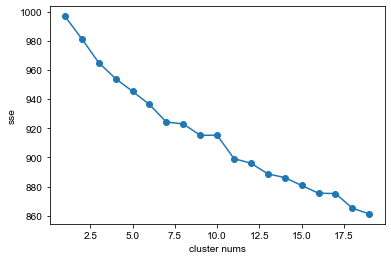

In [17]:
def elbow(x):
    sse = []
    for i in range(1,20):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
        kmeans.fit(x)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,20),sse,marker='o')
    plt.xlabel('cluster nums')
    plt.ylabel('sse')
    plt.show()

elbow(sp_matrix)

In [18]:
cluster_num = 7
kmeans = KMeans(n_clusters=cluster_num, max_iter=10000, random_state=42)
cluster_label = kmeans.fit_predict(sp_matrix)

df['cluster'] = cluster_label

In [19]:
aa = pd.DataFrame(kmeans.cluster_centers_[2],columns=['val'])
aa[aa['val'] > 0.1]

,val
137,0.102886
560,0.112266
631,0.328712
785,0.100884
841,0.125516
1032,0.323085
1053,0.314373


In [228]:
sen = ['자격증 정보 가있는 없다 면결단해야하는것 들']
current_feature = vectorizer.vocabulary_
vect = TfidfVectorizer(vocabulary=current_feature)
new_row = vect.fit_transform(sen)
new_row = new_row.toarray()
new_row

tmp_array = np.vstack([countervect,new_row])
conutervect_df = pd.DataFrame(tmp_array,columns=sorted(vectorizer.vocabulary_))
# conutervect_df.index = df.index

cos = list(cosine_similarity(conutervect_df,conutervect_df)[-1])
cos_rev = sorted(cos)

sim_num = cos.index(cos_rev[-2])

print(df.loc[sim_num]['title'])
print(cos_rev[-3])

sim_list = []
for i in cos_rev:
    if i > 0.4 and i < 1:
        sim_list.append(i)
        print(df.loc[cos.index(i)]['title'],i)
# print(sim_list)

웹개발자 Q&A - 연봉, 전망, 준비 방법, 자격증 정보 + 비전공자... 
0.43738859318804796
비전공자 SQLD 개발자 자격증 / SQL 자격증 도전! 0.43738859318804796
웹개발자 Q&A - 연봉, 전망, 준비 방법, 자격증 정보 + 비전공자...  0.508473297297221


In [376]:
for i in range(10):
    try:
        draw_sen = create_sentence('전공')
    except:
        continue
    tmp_sen = " ".join(draw_sen)
    print(tmp_sen)
# title = []
# for sentence in draw_sen:
#     title.append(" ".join(sentence))
# title

전공 개발자 되는 법 비전공자 가 개발자 되는 법
전공 개발자 비 전공자 개발자 되는 법 비전공자
전공 개발자비전공자 도개발자 취업 준비 방법 에 대하여
전공 개발자 취업 을 위 한 후기 비 전공자가 개발자
전공 개발자 취업 준비 방법 비 전공자 개발자
전공 개발자 비전공자 도 개발자 취업 준비 방법
전공 개발자 로 취업할 수있다 노 코드AI 개발자트랙비전공자
전공 비전공자모두에게유용한정보 가있는런 프리비 전공자 개발자 로 취업
전공 개발자 로 취업 비전공자 개발자 취업 준비


In [324]:
okt.pos("위")[0][1]
# okt.morphs("위")

'Noun'

In [329]:
len("방법")

2